# Objective:-We want to analyze custumer review

In [1]:

from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-iPhone-Black-32GB-Storage/product-reviews/B01LZKSVRB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [5]:
len(cust_name)

4233

In [6]:
len(review_title)

4233

In [7]:
len(review_content)

4233

In [8]:
len(rate)

4233

In [9]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [10]:
#!pip install -U textblob
#!python -m textblob.download_corpora
#!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Umanshu
[nltk_data]     Mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
df = pd.DataFrame()

In [12]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [13]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,jaywant,Defective Iphone 7,1.0 out of 5 stars,i received defective iphone 7 32GB silver co...
1,Bharath Kumar,Switch to iPhone,5.0 out of 5 stars,Thanks for Amazon service. phone is very nic...
2,Utpal Das,"Now I know why people use an iPhone, especiall...",5.0 out of 5 stars,"Redmi phones cameras are great, of course iP..."
3,Rishabh,Black Beauty !!,5.0 out of 5 stars,If you are an apple fan !! This is a true be...
4,zishan ali,Worst battery in expensive iphone,1.0 out of 5 stars,in 20 days i found my battery health 98% whi...
5,mohammad n.,Seller gave me really old product.,1.0 out of 5 stars,Totally disappointed within a month paint st...
6,Keshav Singh,100% Genuine & New Handset,5.0 out of 5 stars,First of all one would want to know is the p...
7,Vikram Nayak,Worth it in 2019,5.0 out of 5 stars,Very good specs which can handle updates for...
8,Sunil Bhawariya,"Go for it, very nice budget iPhone. I’m loving...",5.0 out of 5 stars,Everything is awesome when it comes to an ip...
9,Lalit A.,I phone 7,2.0 out of 5 stars,This iPhone7 is in hearing problems. What Ca...


In [14]:
df.to_csv(r'E:fill.csv',index = True)


In [15]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [16]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [17]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [18]:
data['Rating']

0       1.0
1       5.0
2       5.0
3       5.0
4       1.0
       ... 
4228    5.0
4229    5.0
4230    1.0
4231    5.0
4232    1.0
Name: Rating, Length: 4233, dtype: object

In [19]:
data['Rating'].value_counts(normalize=True)*100

5.0    56.980865
1.0    18.521143
4.0    15.473659
3.0     5.693362
2.0     3.330971
Name: Rating, dtype: float64

In [20]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,784,784,784
2.0,141,141,140
3.0,241,241,241
4.0,655,655,653
5.0,2412,2411,2406


Text(0, 0.5, 'Count')

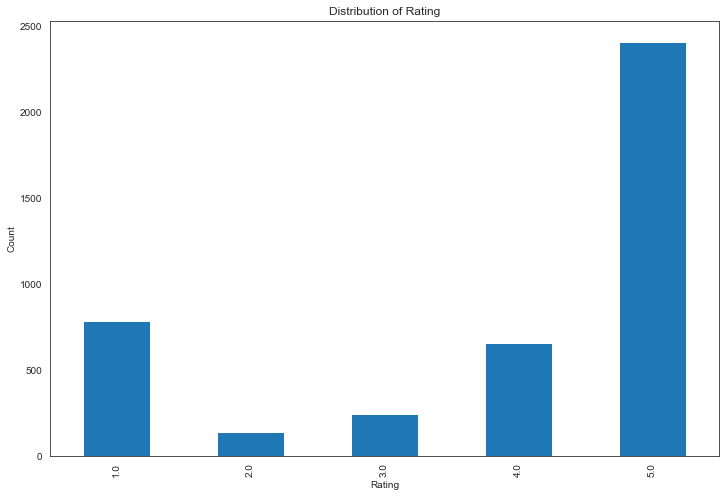

In [21]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

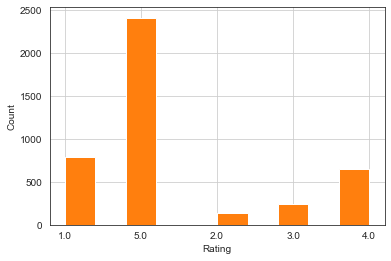

In [22]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [23]:
data.iloc[:,[3]]

,Reviews
0,i received defective iphone 7 32GB silver co...
1,Thanks for Amazon service. phone is very nic...
2,"Redmi phones cameras are great, of course iP..."
3,If you are an apple fan !! This is a true be...
4,in 20 days i found my battery health 98% whi...
...,...
4228,Pros:My previous I phone was 6s which I lost...
4229,Very nice product
4230,Extremely poor battery back up.
4231,"Very Good Phone, thank you!"


In [24]:

Reviews=data.iloc[:,[3]]

In [25]:
Reviews.shape

(4233, 1)

In [26]:
Reviews.describe()

,Reviews
count,4224
unique,3616
top,Good
freq,151


In [27]:
Reviews.dtypes

Reviews    object
dtype: object

In [28]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,1.0,i received defective iphone 7 32GB silver co...
1,5.0,Thanks for Amazon service. phone is very nic...
2,5.0,"Redmi phones cameras are great, of course iP..."
3,5.0,If you are an apple fan !! This is a true be...
4,1.0,in 20 days i found my battery health 98% whi...


In [30]:
data.dropna(inplace=True)

In [31]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [32]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [33]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

In [34]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [35]:
stop_words=stopwords.words('english')

In [36]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [37]:
data

,Rating,Reviews
0,1.0,received defective iphone gb silver colour gre...
1,5.0,thanks amazon service phone nice cool also dis...
2,5.0,redmi phones cameras great course iphone bette...
3,5.0,apple fan true beauty go
4,1.0,days found battery health disappointing experi...
...,...,...
4228,5.0,prosmy previous phone lost market make police ...
4229,5.0,nice product
4230,1.0,extremely poor battery back
4231,5.0,good phone thank


In [39]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [40]:
data['Reviews'].head()

0    received defective iphone gb silver colour gre...
1    thanks amazon service phone nice cool also dis...
2    redmi phone camera great course iphone better ...
3                             apple fan true beauty go
4    day found battery health disappointing experie...
Name: Reviews, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aaaamazing  aana  aapario  aaple  aapta  aavda  aavi  aaya  ab  abgnac  \
0              0     0        0      0      0      0     0     0   0       0   
1              0     0        0      0      0      0     0     0   0       0   
2              0     0        0      0      0      0     0     0   0       0   
3              0     0        0      0      0      0     0     0   0       0   
4              0     0        0      0      0      0     0     0   0       0   
...          ...   ...      ...    ...    ...    ...   ...   ...  ..     ...   
4219           0     0        0      0      0      0     0     0   0       0   
4220           0     0        0      0      0      0     0     0   0       0   
4221           0     0        0      0      0      0     0     0   0       0   
4222           0     0        0      0      0      0     0     0   0       0   
4223           0     0        0      0      0      0     0     0   0       0   

      ...  yrsrestarting  ysing  zabbar

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 59)	0.14375825747598658
  (0, 4425)	0.12676502091130293
  (0, 1887)	0.15103523587872936
  (0, 5631)	0.11175493245739955
  (0, 2022)	0.16245266811456216
  (0, 4496)	0.09080917099520015
  (0, 2665)	0.13176607541049323
  (0, 3242)	0.15790003319803783
  (0, 4257)	0.16832203534560455
  (0, 4705)	0.15103523587872936
  (0, 268)	0.14590785113254448
  (0, 5191)	0.265864473570968
  (0, 4007)	0.046809435023198405
  (0, 3434)	0.13176607541049323
  (0, 4199)	0.17659444383661338
  (0, 6081)	0.14375825747598658
  (0, 1975)	0.11307166477191767
  (0, 5342)	0.10897752712149644
  (0, 4966)	0.08919955550295636
  (0, 276)	0.06702123830651807
  (0, 6025)	0.13548584898497776
  (0, 339)	0.13066298138001461
  (0, 4639)	0.16245266811456216
  (0, 1791)	0.17659444383661338
  (0, 3749)	0.11218446979003331
  :	:
  (4219, 3150)	0.15198676865856503
  (4219, 1505)	0.11166563254825401
  (4219, 591)	0.08073957122642907
  (4219, 980)	0.12664429095766952
  (4219, 161)	0.07854073080282871
  (4219, 4007)	0.17132702571

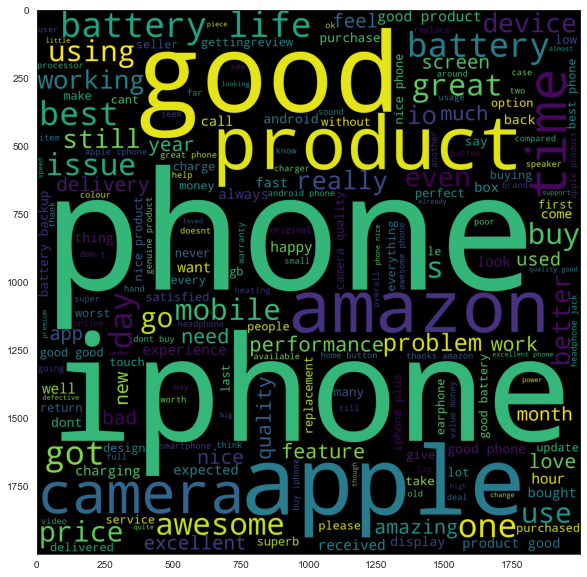

In [43]:

Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [44]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

0    received defective iphone gb silver colour gre...
1    thanks amazon service phone nice cool also dis...
2    redmi phone camera great course iphone better ...
3                             apple fan true beauty go
4    day found battery health disappointing experie...
Name: Reviews, dtype: object

#  Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [45]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

phone      1746
iphone     1192
good       1174
product    1000
battery     831
apple       659
amazon      552
camera      417
one         351
buy         340
dtype: int64

# Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [46]:

data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()


0    received defective gb silver colour great indi...
1    thanks service nice cool also display cool sou...
2    redmi great course better redmi get justifiabl...
3                                   fan true beauty go
4    day found health disappointing experience sugg...
Name: Reviews, dtype: object

#  Rare words removal
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [47]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq


phonedelivered    1
unsatisfactory    1
continuo          1
ull               1
goodness          1
goodshow          1
qualitybetter     1
truth             1
productfrom       1
heaten            1
dtype: int64

In [48]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    received defective go silver colour great indi...
1    thanks service nice cool also display cool sou...
2    red great course better red get justifiable di...
3                                   fan true beauty go
4    day found health disappointing experience sugg...
5    totally disappointed within month paint starte...
6    first would want know genuine refurbished co b...
7    speck handle update next or people dont use po...
8    everything awesome come surely love day usesth...
9                                      hearing problem
Name: Reviews, dtype: object

# 2.7 Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [49]:
TextBlob(data['Reviews'][0]).words

WordList(['received', 'defective', 'gb', 'silver', 'colour', 'great', 'indian', 'festival', 'sale', 'delivered', 'daybut', 'seems', 'non', 'functional', 'rear', 'get', 'freeze', 'due', 'faulty', 'sensor', 'save', 'time', 'money', 'bought', 'online', 'estore', 'representative', 'asked', 'visit', 'service', 'store', 'far', 'wasted', 'precious', 'time', 'mind', 'sold', 'sold', 'appario', 'retail', 'private', 'ltd', 'im', 'really', 'fed', 'till', 'expecting', 'quick', 'action'])

In [50]:
TextBlob(data['Reviews'][1]).words

WordList(['thanks', 'service', 'nice', 'cool', 'also', 'display', 'cool', 'sound', 'clarity', 'excellent', 'slim', 'processor', 'fast', 'nice', 'performance', 'gaming', 'compare', 'superb'])

# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [51]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    receiv defect gb silver colour great indian fe...
1    thank servic nice cool also display cool sound...
2    redmi great cours better redmi get justifi dif...
3                                   fan true beauti go
4    day found health disappoint experi suggest use...
5    total disappoint within month paint start come...
6    first would want know genuin refurbish coz big...
7    spec handl updat next yr peopl dont use power ...
8    everyth awesom come sure love day usesthank se...
9                                         hear problem
Name: Reviews, dtype: object

# Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [52]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()


0    received defective gb silver colour great indi...
1    thanks service nice cool also display cool sou...
2    redmi great course better redmi get justifiabl...
3                                   fan true beauty go
4    day found health disappointing experience sugg...
Name: Reviews, dtype: object

# Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

 
# N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [53]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['received', 'defective']),
 WordList(['defective', 'gb']),
 WordList(['gb', 'silver']),
 WordList(['silver', 'colour']),
 WordList(['colour', 'great']),
 WordList(['great', 'indian']),
 WordList(['indian', 'festival']),
 WordList(['festival', 'sale']),
 WordList(['sale', 'delivered']),
 WordList(['delivered', 'daybut']),
 WordList(['daybut', 'seems']),
 WordList(['seems', 'non']),
 WordList(['non', 'functional']),
 WordList(['functional', 'rear']),
 WordList(['rear', 'get']),
 WordList(['get', 'freeze']),
 WordList(['freeze', 'due']),
 WordList(['due', 'faulty']),
 WordList(['faulty', 'sensor']),
 WordList(['sensor', 'save']),
 WordList(['save', 'time']),
 WordList(['time', 'money']),
 WordList(['money', 'bought']),
 WordList(['bought', 'online']),
 WordList(['online', 'estore']),
 WordList(['estore', 'representative']),
 WordList(['representative', 'asked']),
 WordList(['asked', 'visit']),
 WordList(['visit', 'service']),
 WordList(['service', 'store']),
 WordList(['store',

# Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [54]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,nice,4.0
1,cool,4.0
2,fast,3.0
3,slim,2.0
4,excellent,2.0
...,...,...
201,come,1.0
202,usesthanks,1.0
203,faceidgo,1.0
204,problem,1.0


# Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [55]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [56]:
tf1

,words,tf,idf
0,nice,4.0,2.580217
1,cool,4.0,4.981242
2,fast,3.0,3.242592
3,slim,2.0,5.863631
4,excellent,2.0,3.139052
...,...,...,...
201,come,1.0,3.917721
202,usesthanks,1.0,8.348538
203,faceidgo,1.0,8.348538
204,problem,1.0,3.292292


The more the value of IDF, the more unique is the word.

# Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [57]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,nice,4.0,2.580217,10.320867
1,cool,4.0,4.981242,19.924968
2,fast,3.0,3.242592,9.727777
3,slim,2.0,5.863631,11.727262
4,excellent,2.0,3.139052,6.278103
...,...,...,...,...
201,come,1.0,3.917721,3.917721
202,usesthanks,1.0,8.348538,8.348538
203,faceidgo,1.0,8.348538,8.348538
204,problem,1.0,3.292292,3.292292


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<4224x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 24436 stored elements in Compressed Sparse Row format>

# Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<4224x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 27929 stored elements in Compressed Sparse Row format>

# Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [60]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0     (0.1898148148148148, 0.47777777777777775)
1      (0.5222222222222223, 0.7222222222222222)
2     (0.2421678321678322, 0.49487567987567993)
3                                  (0.35, 0.65)
4                                  (-0.8, 0.85)
5    (-0.2599999999999999, 0.38333333333333336)
6     (0.2532828282828283, 0.39797979797979793)
7                  (-0.016666666666666666, 0.3)
8                  (0.42083333333333334, 0.725)
9                                    (0.0, 0.0)
Name: Reviews, dtype: object

# Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [61]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,received defective gb silver colour great indi...,0.189815
1,thanks service nice cool also display cool sou...,0.522222
2,redmi great course better redmi get justifiabl...,0.242168
3,fan true beauty go,0.350000
4,day found health disappointing experience sugg...,-0.800000


# Word Embeddings
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [62]:
#!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [63]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'D:\\Data sets\\negative-words.txt'
word2vec_output_file = 'D:\\Data sets\\positive-word.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(4818, 0)

In [64]:

import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Umanshu
[nltk_data]     Mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,received defective gb silver colour great indi...,0.189815
1,thanks service nice cool also display cool sou...,0.522222
2,redmi great course better redmi get justifiabl...,0.242168
3,fan true beauty go,0.350000
4,day found health disappointing experience sugg...,-0.800000


In [66]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
0,1.0,received defective gb silver colour great indi...,0.189815,0.189815
1,5.0,thanks service nice cool also display cool sou...,0.522222,0.522222
2,5.0,redmi great course better redmi get justifiabl...,0.242168,0.242168
3,5.0,fan true beauty go,0.350000,0.350000
6,5.0,first would want know genuine refurbished coz ...,0.253283,0.253283


In [67]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [68]:
sent_type(data['polarity'])

positive
positive
positive
positive
negative
negative
positive
negative
positive
neutral
negative
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
negative
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
neutral
positive
negative
negative
positive
negative
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
neutral
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
negative
neutral
negative
positive
positive
neutral
negative
positive
positive
positive
negative
neutral
positive
negative
negative
positive
positive
positive
neutral
neutral


In [69]:
data["category"]=data['polarity']

In [70]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [71]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

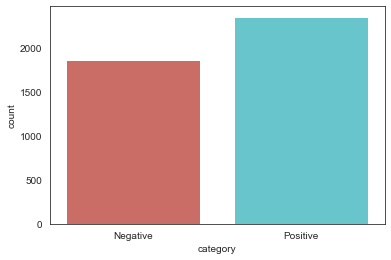

In [72]:
sns.countplot(x='category',data=data,palette='hls')

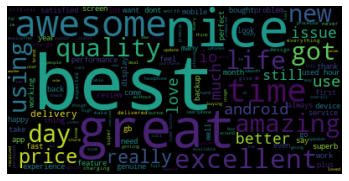

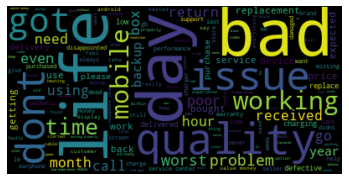

In [73]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

In [74]:
#Percentage of positive review
data.category.value_counts(normalize=True).mul(100)

Positive    55.776515
Negative    44.223485
Name: category, dtype: float64

# Conclusion:-We got the 58% positive review of Apple Iphone7 